## <font color=#aacaff>Exploratory Data Analysis (EDA)</font> 

EDA is the process of figuring out what the data can tell us and we use EDA to find patterns, relationships, or anomalies to inform our subsequent analysis. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

## Problem Statement
The objective of this dataset is to build a predictive model for diagnosing diabetes in female patients who are of Pima Indian heritage. The model should predict whether a patient has diabetes (Outcome = 1) or does not have diabetes (Outcome = 0) based on several diagnostic measurements.

<font color=#aacaff size=6><strong>---------------------- Column Description ---------------------</strong></font>
<style>
    .heatMap {
        width: 90%;
        text-align: center;
    }
    .heatMap th {
        background: black;
        text-align: left;
        font-weight: bold;
        color: #e0e0e0;
    }
    .heatMap tr { 
        background: white;
        text-align: left;
        color: black; }

</style>

<div class="heatMap">

| No | Column | Description | 
| -- | -- | -- |
| 1   | <font color=#057f5f size=3><strong>Pregnancies</strong></font> | Number of pregnancies  |
| 2   | <font color=#002296 size=3><strong>Glucose</strong></font> |Plasma glucose concentration from oral glucose tolerance test |
| 3   | <font color=#a7204c size=3><strong>BloodPressure</strong></font> | Diastolic blood pressure (mm Hg)  |
| 4   | <font color=#a17e5a size=3><strong>SkinThickness</strong></font> | Triceps skin fold thickness (mm) |
| 5   | <font color=#7f007f size=3><strong>Insulin</strong></font> | Serum insulin level in blood (mu U/ml)  |
| 6   | <font color=#739373 size=3><strong>BMI</strong></font> | Body mass index (weight in kg/(height in m)^2) |
| 7   | <font color=#ff6108 size=3><strong>DiabetesPedigreeFunction</strong></font> | Score or the likelihood of diabetes based on family history     |
| 8   | <font color=#0097df size=3><strong>Age</strong></font>  | Age in years |
| 9   | <font color=#555555 size=3><strong>Outcome</strong></font> | Final result (1: Yes, the individual has diabetes; 0: No, the individual does not have diabetes)      | 

</div>

<style>
    .heatMap {
        background: white;
        text-align: left;
        color: black;
    }

</style>

<div class="heatMap"

<font color=#057f5f size=6><strong>--------------------------- Findings ----------------------------</strong></font>

We have 8 features which could possibly be used for prediction. Usefulness wise, every feature seems like it can provide some usable insight in predicting the diabetes. But more could be found out by further analysis.

<font color=#7f007f size=6><strong>-------------------------- Next Steps --------------------------</strong></font>
- Load and study the data contents
- Get preliminary information like sample count and quality\
<br />

</div>




In [7]:
pima_df = pd.read_csv('D:/Users/DevPatsay/pure_ml_scripts/data/indian-diabetes-study/diabetes.csv')
print(f"Number of Data Samples : {pima_df.shape[0]} \nNumber of Features : {pima_df.shape[1]}")
pima_df.head()

Number of Data Samples : 768 
Number of Features : 9


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<style>
    .heatMap {
        background: white;
        text-align: left;
        color: black;
    }

</style>

<div class="heatMap"

<font color=#057f5f size=6><strong>--------------------------- Findings ----------------------------</strong></font>

We have 768 samples and column information seems accurate. All column values seem to be numerical so further value conversion doesn't seem necessary.

<font color=#7f007f size=6><strong>-------------------------- Next Steps --------------------------</strong></font>
- Look out for null values
- Get dataset description\
<br />

</div>

In [11]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
print(pima_df.isnull().sum())
pima_df.describe()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<style>
    .heatMap {
        background: white;
        text-align: left;
        color: black;
    }

</style>

<div class="heatMap"

<font color=#057f5f size=6><strong>--------------------------- Findings ----------------------------</strong></font>

There seem to be no null values. But it is also observed that following columns have min value 0

1. Pregnancies
2. Glucose
3. Blood Pressure
4. SkinThickness	
5. Insulin	
6. BMI

Out of these only 0 number of pregnancies sound plausible. It may be the case that unknown (missing) values in other columns are simply substituted by 0. But if maximum values in certain column fall into this 'missing but substituted' category, then that feature may not provide useful insights for training.


<font color=#7f007f size=6><strong>-------------------------- Next Steps --------------------------</strong></font>
- Convert categorical values (if any) to numerical ones 
- Check out value distribution of individual feature
- Get dominating value range and idea about outliers for each feature\
<br />

</div>

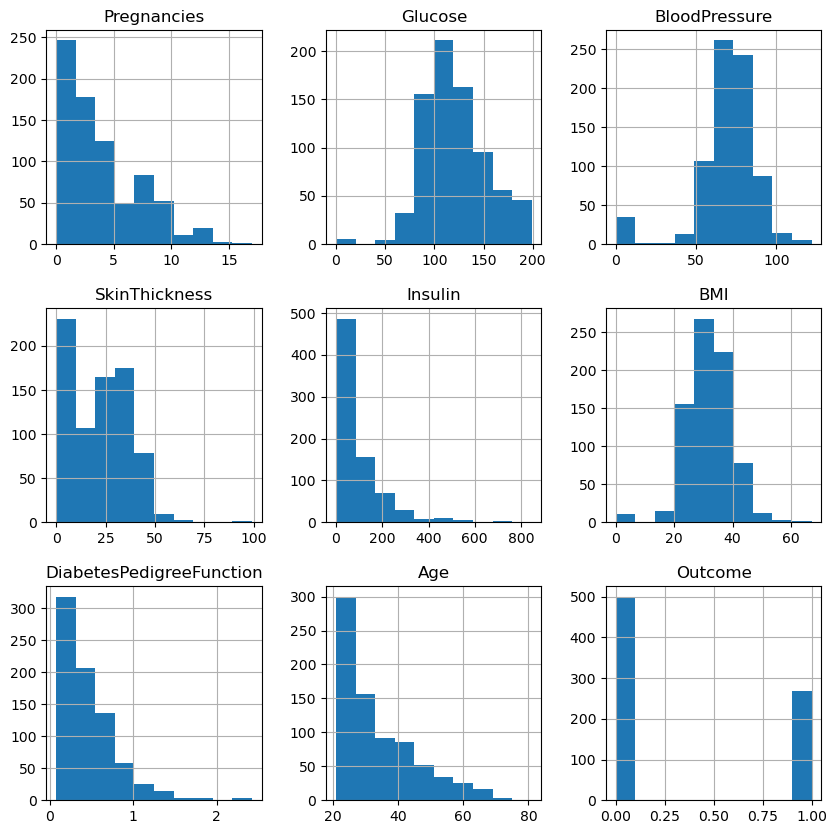

In [15]:
# since we have all numerical data, the conversion not needed
pima_df.hist(figsize = (10,10))
plt.show()

<style>
    .heatMap {
        background: white;
        text-align: left;
        color: black;
    }

</style>

<div class="heatMap"

<font color=#057f5f size=6><strong>--------------------------- Findings ----------------------------</strong></font>

Comments on 0 value columns identified previously

1. Pregnancies: 250 (1/3 candidates) have this value. But 0 value is possible, considering that 0 pregnancies is not really unheard of if age is between 20 - 80
2. Glucose : Not too many samples at 0
3. Blood Pressure : Not too many samples at 0
4. <font color=blue><strong>SkinThickness</strong></font> : more than 200 samples have 0. So 0 seems more like filler rather than possible real 0 value	
5. <font color=blue><strong>Insulin</strong></font>: more than half samples have 0. So 0 seems more like filler rather than possible real 0 value
6. BMI: Not too many samples at 0



<font color=#7f007f size=6><strong>-------------------------- Next Steps --------------------------</strong></font>
- For more distribution related clarity let's study box plots\
<br />

</div>

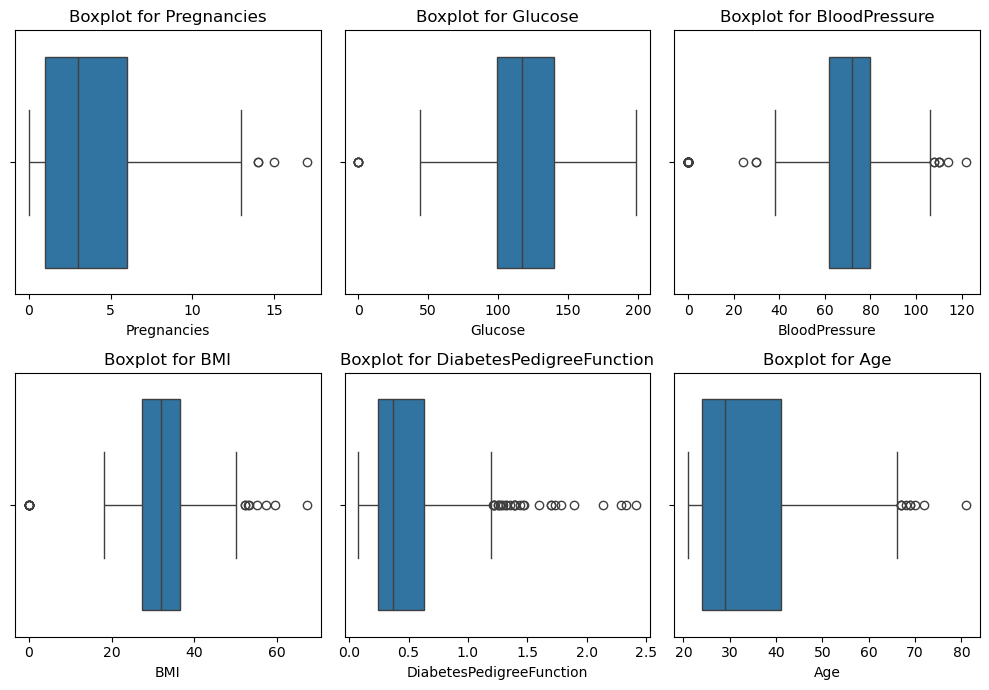

In [14]:
n_rows, n_columns = 2, 3

fig, axes = plt.subplots(n_rows, n_columns, figsize=(10, 7))
axes = axes.flatten()

num = 0
for i, column in enumerate(pima_df.columns):
    if column not in ["SkinThickness", "Insulin", "Outcome"]:
        sns.boxplot(data=pima_df, x=column, ax=axes[num])
        axes[num].set_title(f'Boxplot for {column}')
        num += 1
        
# Adjust layout
plt.tight_layout()
plt.show()

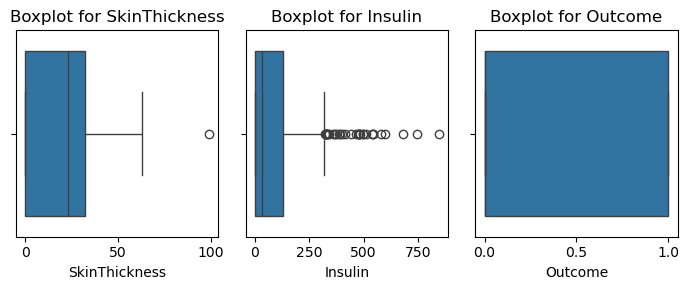

In [18]:
n_rows, n_columns = 1, 3

fig, axes = plt.subplots(n_rows, n_columns, figsize=(7, 3))
axes = axes.flatten()

num = 0
for i, column in enumerate(pima_df.columns):
    if column in ["SkinThickness", "Insulin", "Outcome"]:
        sns.boxplot(data=pima_df, x=column, ax=axes[num])
        axes[num].set_title(f'Boxplot for {column}')
        num += 1
        
# Adjust layout
plt.tight_layout()
plt.show()

<style>
    .heatMap {
        background: white;
        text-align: left;
        color: black;
    }

</style>

<div class="heatMap"

<font color=#057f5f size=6><strong>--------------------------- Findings ----------------------------</strong></font>

A box plot (aka box and whisker plot) uses boxes and lines to depict the numerical distributions. 

What a box plot represents?

![Alt text](data/box.png)

The features like Pregnancies, Glucose, BloodPressure, BMI, DiabetesPedigreeFunction and Age show well distributed values. The range of these features seems sensible with fewer outliers.

For the features SkinThickness and Insulin show a bit skewed distribution, many of the values being zero. At least for SkinThickness median seems farther away from zero and the distribution looks healthy. Hence, if correlation between SkinThickness and Outcome yields good relation then, SkinThickness can still be used.

Insulin however seems like the incomplete information. So it may be good idea to drop that feature.


<font color=#7f007f size=6><strong>-------------------------- Next Steps --------------------------</strong></font>
- Next we examine correlation plots
- Make a hypothesis as to which feature can very directly 'influence' the outcome\
<br />

</div>

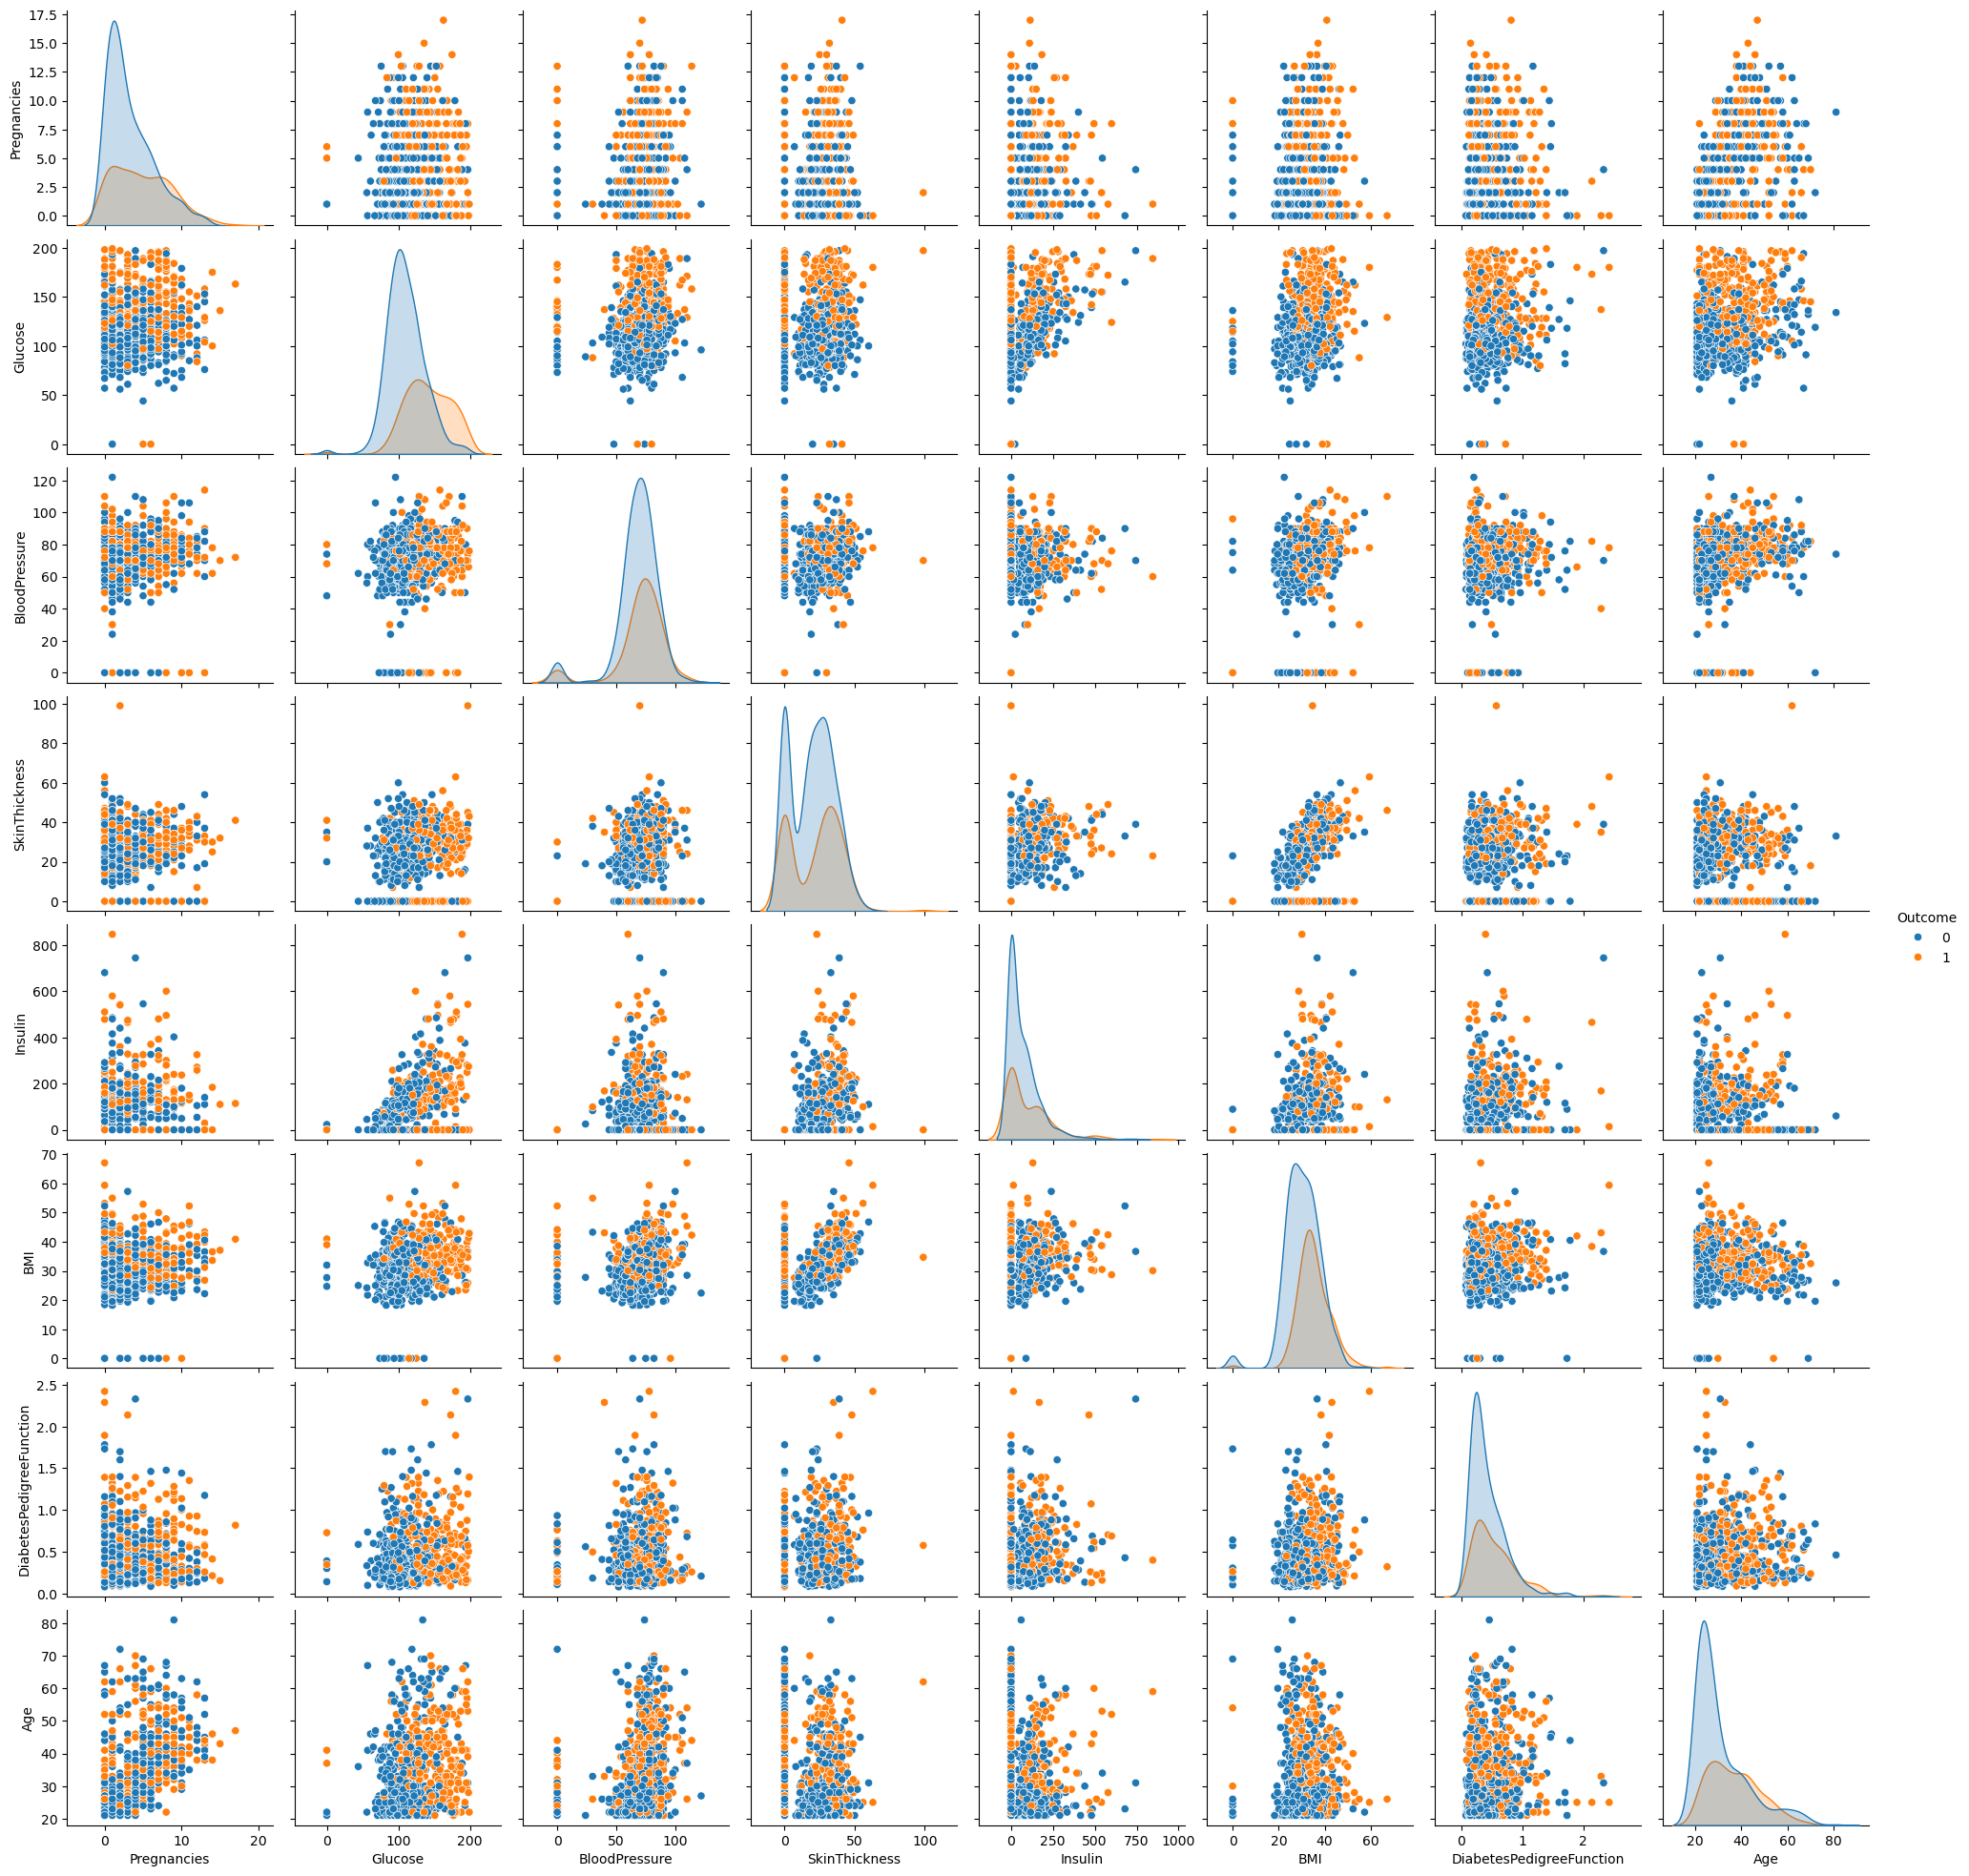

In [19]:
sns.pairplot(data = pima_df, hue = 'Outcome' )
plt.show()



<style>
    .heatMap {
        background: white;
        text-align: left;
        color: black;
    }

</style>

<div class="heatMap"

<font color=#057f5f size=6><strong>--------------------------- Findings ----------------------------</strong></font>
On primary inspection there doesn't seem to be any feature that could single handedly influence the outcome. Features like Glucose, BMI and Age seem to clearly influence the outcome. But there is no single feature that could alone be conclusive in that regard.

Also, features like SkinThickness + BMI or Insulin + Glucose seem highly correlated.


<font color=#7f007f size=6><strong>-------------------------- Next Steps --------------------------</strong></font>
- Dive deeper in feature to feature correlation\
<br />

</div>

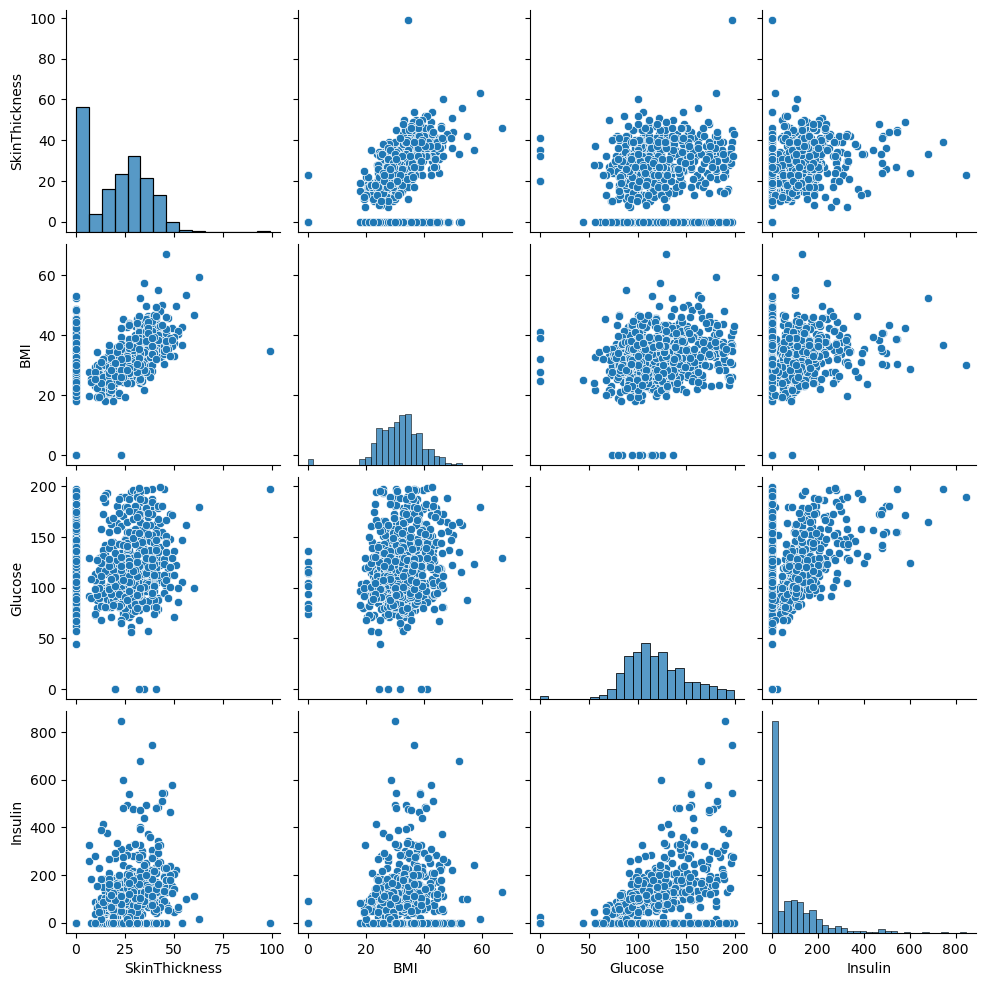

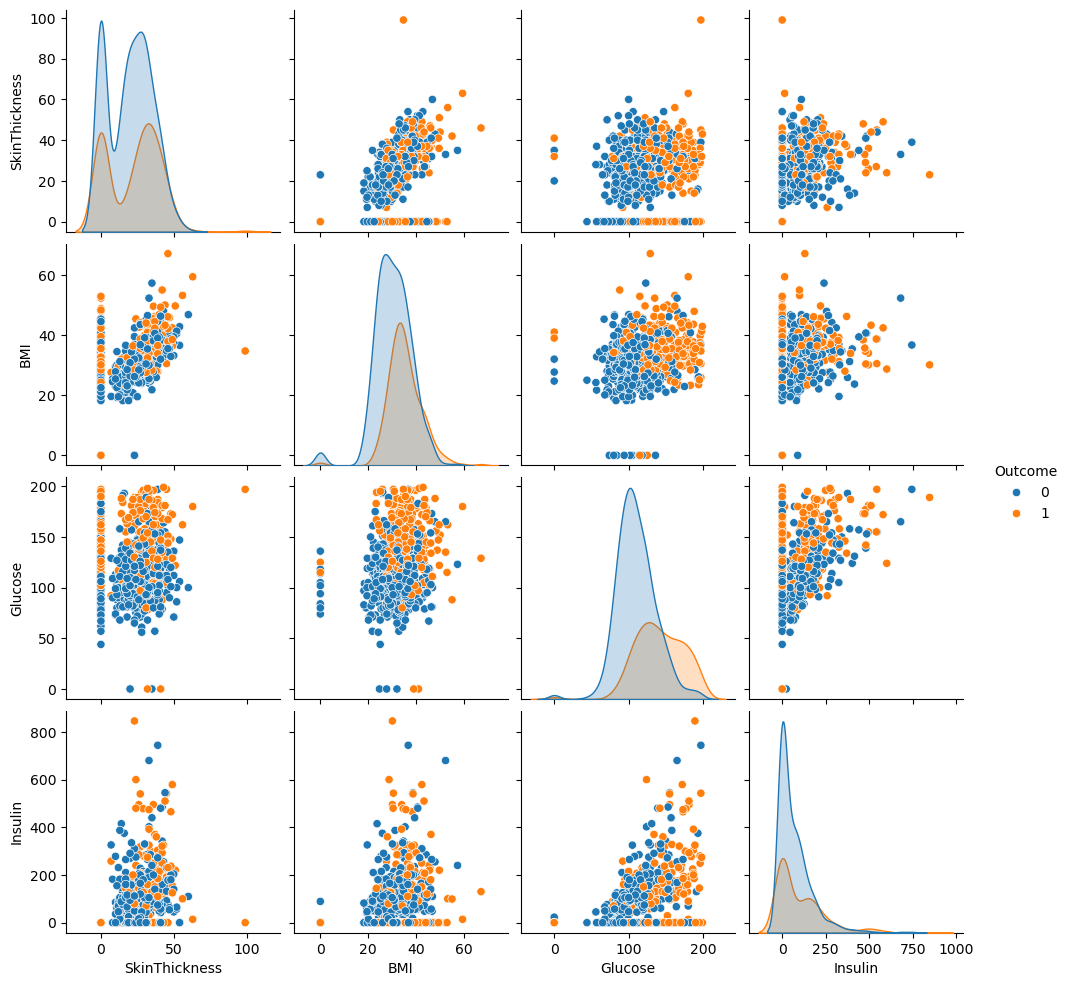

In [21]:
sns.pairplot(data = pima_df, vars = ['SkinThickness', 'BMI', 'Glucose', 'Insulin'])
plt.show()

sns.pairplot(data = pima_df, vars = ['SkinThickness', 'BMI', 'Glucose', 'Insulin'], hue = 'Outcome')
plt.show()

<style>
    .heatMap {
        background: white;
        text-align: left;
        color: black;
    }

</style>

<div class="heatMap"

<font color=#057f5f size=6><strong>--------------------------- Findings ----------------------------</strong></font>
Correlation : Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other.

Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

Since we could identify two such highly correlated pairs. We can safely decide which features to keep.
1. SkinThickness + BMI : We will keep BMI due to fewer missing / 0 values
2. Insulin + Glucose : We will keep Glucose again because of  fewer missing / 0 values

<font color=#7f007f size=6><strong>-------------------------- Next Steps --------------------------</strong></font>
- Discard / drop not needed columns
- We will see how to deal with  missing / 0 values. 
- And then we will see correlation of selected features with Outcome\
<br />

</div>


In [27]:
pima_df_1 = pima_df.drop(['Insulin', 'SkinThickness'], axis = 1)

<style>
    .heatMap {
        background: white;
        text-align: left;
        color: black;
    }

</style>

<div class="heatMap"

<font color=#2a2490 size=6><strong>----------------------- Generalization --------------------------</strong></font>
For variables that we are hoping to use for final model building, we must use generalization to fill in the gaps in data. But off course, there need to be sufficient non missing values to perform generalization. So if some of the features have too many missing values, it is a good idea to drop it rather than preforming generalization.

Out of important features, BloodPressure, DiabetesPedigreeFunction, BMI still seem to have quite a few missing / 0 values. We will perform percentile based generalization on them. \
<br />

</div>


In [28]:
gen_columns = ['BloodPressure', 'DiabetesPedigreeFunction', 'BMI']

for column in gen_columns:
    Q1 = np.percentile(pima_df_1[column], 25, interpolation='midpoint')
    Q3 = np.percentile(pima_df_1[column], 75, interpolation='midpoint')
    print(column, Q1, Q3)
    # Find outliers in the specified column
    outliers_0 = (pima_df_1[column] == 0)
    
    # Set value randomly from 50th percentile (from midpoint)
    pima_df_1.loc[outliers_0, column] = np.random.uniform(Q1, Q3)

BloodPressure 62.0 80.0
DiabetesPedigreeFunction 0.2435 0.6265000000000001
BMI 27.3 36.6


<Axes: >

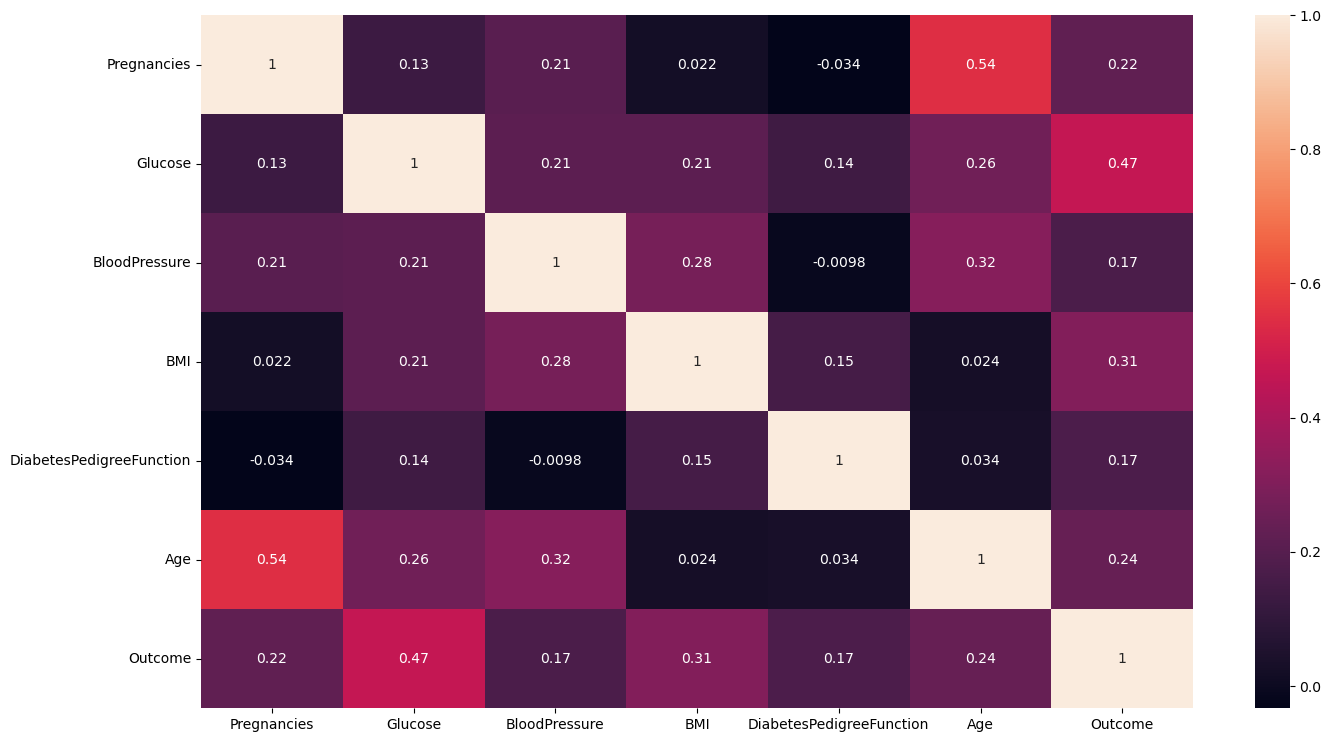

In [29]:
plt.figure(figsize=(16,9))
sns.heatmap(pima_df_1.corr(), annot=True)

In [30]:
hig_corr = pima_df_1.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Outcome"]) >= 0.2]
hig_corr_features

Index(['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome'], dtype='object')

<style>
    .heatMap {
        background: white;
        text-align: left;
        color: black;
    }

</style>

<div class="heatMap"

<font color=#057f5f size=6><strong>--------------------------- Findings ----------------------------</strong></font>
There are no features that are 'highly' correlated with each other anymore. 

As far as the outcome goes, features Pregnancies, Glucose, BMI and Age seem to influence the outcome the most. 

<font color=#7f007f size=6><strong>-------------------------- Next Steps --------------------------</strong></font>
- Separating X and Y
- Making test and train splits\
<br />

</div>


In [31]:
X = pima_df_1.drop('Outcome', axis = 1)
y = pima_df_1['Outcome']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

<font color=#aacaff size=6><strong>-------------------- Logistic Regression ---------------------</font>

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
log_reg.fit(X_train, y_train)


LogisticRegression(C=1, max_iter=200, solver='liblinear')

Train Accuracy: 75.87%
Val Accuracy: 76.56%


Text(0.5, 1.0, 'Test Confusion Matrix')

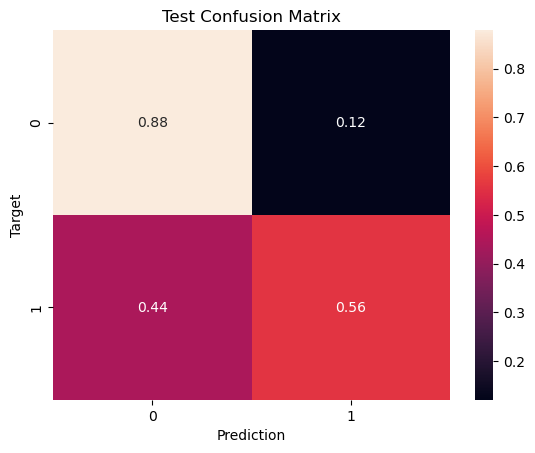

In [38]:
preds = log_reg.predict(X_train)
accuracy = accuracy_score(y_train, preds)
print("Train Accuracy: {:.2f}%".format(accuracy * 100))

preds = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print("Val Accuracy: {:.2f}%".format(accuracy * 100))

cf = confusion_matrix(y_test, preds, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix')

<font color=#aacaff size=6><strong>-------------------- Random Forest ---------------------</font>

In [39]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(n_jobs =-1, random_state = 42)
model_2.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [56]:
model_2.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Train Accuracy: 100.00%
Val Accuracy: 79.69%


Text(0.5, 1.0, 'Test Confusion Matrix')

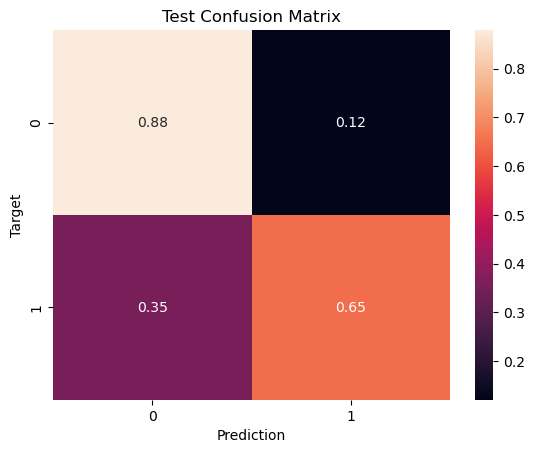

In [40]:
preds = model_2.predict(X_train)
accuracy = accuracy_score(y_train, preds)
print("Train Accuracy: {:.2f}%".format(accuracy * 100))

preds = model_2.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print("Val Accuracy: {:.2f}%".format(accuracy * 100))

cf = confusion_matrix(y_test, preds, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix')

<font color=#aacaff size=6><strong>-------- Hyperparameter Tuning on Random Forest -------- </font>

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint

param_dist = {
        'n_estimators': randint(80, 150), # Adjust the number of trees in the forest
        'min_samples_split': randint(1, 5),  # Adjust the minimum samples required to split a node
        'min_samples_leaf': randint(1, 5), # Adjust the minimum samples required in a leaf node
}

model = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = RandomizedSearchCV(model, param_dist, cv=5, n_iter=10, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)


RandomForestClassifier(min_samples_leaf=4, min_samples_split=3,
                       n_estimators=138, n_jobs=-1, random_state=42)

Train Accuracy: 91.67%
Val Accuracy: 75.00%


Text(0.5, 1.0, 'Test Confusion Matrix')

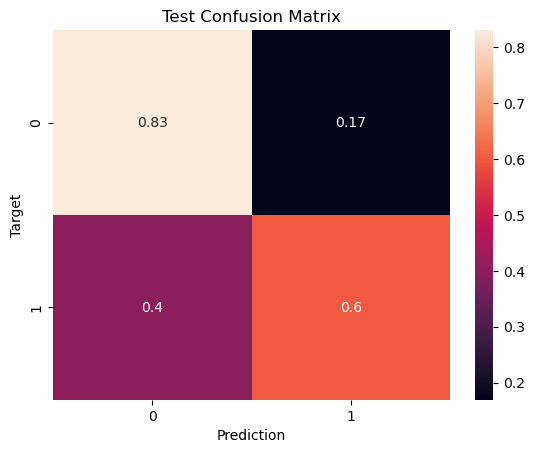

In [61]:
preds = best_model.predict(X_train)
accuracy = accuracy_score(y_train, preds)
print("Train Accuracy: {:.2f}%".format(accuracy * 100))

preds = best_model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print("Val Accuracy: {:.2f}%".format(accuracy * 100))

cf = confusion_matrix(y_test, preds, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix')

<font color=#aacaff size=6><strong>-------------------- Decision Tree ---------------------</font>

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Train Accuracy: 100.00%
Val Accuracy: 70.31%


Text(0.5, 1.0, 'Test Confusion Matrix')

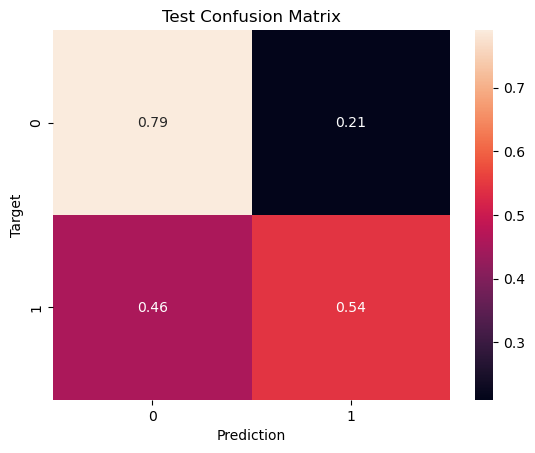

In [50]:
preds = decision_tree_model.predict(X_train)
accuracy = accuracy_score(y_train, preds)
print("Train Accuracy: {:.2f}%".format(accuracy * 100))

preds = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print("Val Accuracy: {:.2f}%".format(accuracy * 100))

cf = confusion_matrix(y_test, preds, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix')

<font color=#aacaff size=6><strong>--------------------Gradient Boost ---------------------</font>

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gbm_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)

# Fit the GBM model to the training data
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

Train Accuracy: 91.15%
Val Accuracy: 78.65%


Text(0.5, 1.0, 'Test Confusion Matrix')

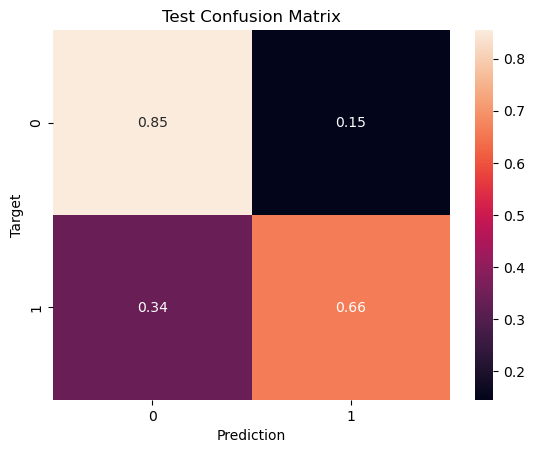

In [49]:
preds = gbm_model.predict(X_train)
accuracy = accuracy_score(y_train, preds)
print("Train Accuracy: {:.2f}%".format(accuracy * 100))

preds = gbm_model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print("Val Accuracy: {:.2f}%".format(accuracy * 100))

cf = confusion_matrix(y_test, preds, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix')

In [ ]:
https://www.datacamp.com/blog/curse-of-dimensionality-machine-learning

https://www.datacamp.com/tutorial/kaggle-tutorial-machine-learning : EDA (exploratory data analysis)
Analysing components and extracting insights from them

